# Data Science Basics - Random Forest - Complete Guide

#### What is it?
A Random Forest is an ensemble technique which can have capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

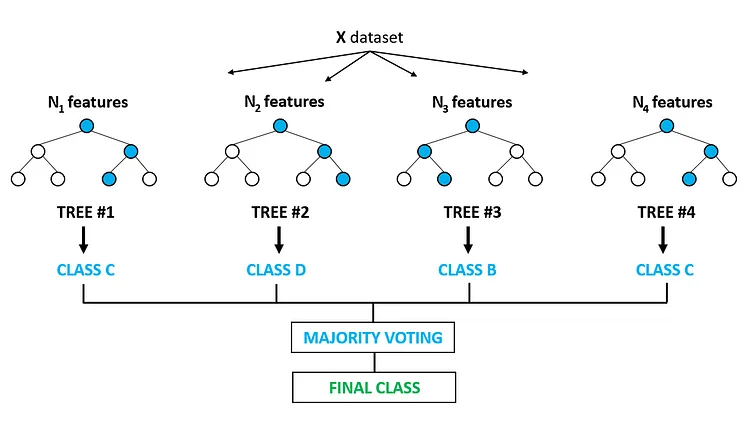

#### How the Random Forest Algorithm Works
 - Select random samples from a given dataset.
 - Construct a decision tree for each sample and get a prediction result from each decision tree.
 - Perform a vote for each predicted result.
 - Select the prediction result with the most votes as the final prediction.

#### Important Feature for Classification
Random forest uses gini importance ormean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

#### Random Forests vs Decision Trees
 - Random forests is a set of multiple decision trees.
 - Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
 - Decision trees are computationally faster.
 - Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

## Part 1: Random Forest as a Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
diabetes = datasets.load_diabetes()
diabetes.keys()

In [ ]:
print(diabetes.DESCR)

In [ ]:
X = diabetes.data
y = diabetes.target
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### RandomForestRegressor()
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.Let’s look at script:

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The following plot shows predicted data of y and testing data of y.

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred, label="y_pred")
plt.plot(y_test, label="y_test")
plt.xlabel("X_test", fontsize=14)
plt.ylabel("Value of y(pred , test)", fontsize=14)
plt.title("Comparing predicted values and true values")
plt.legend(title="Parameter where:")
plt.show()

Let’s see the Root Mean Square Error of data.To get this we will use function called mean_squared_error().Now, have a look at following code:

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
(72.78 - 53.50) / 72.78

In [ ]:
y_test.std()

#### Random Forest as a Classifier with iris dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris = datasets.load_iris()
iris.target_names

In [ ]:
print(iris.DESCR)

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.3, stratify=y
)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
RandomForestClassifier(random_state=42)

#### predict()
In a given trained model, predict the label of a new set of data. This method accepts one argument, the new data X_test , and returns the learned label for each object in the array.

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
mat = metrics.confusion_matrix(y_test, y_pred)
mat

#### Confusion_matrix ( )
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
Each cell in the square box represents relateve or absolute ratios between y_test and y_pred .

Let’s try to plot output of classifier by using confusion_matrix () function to represent with respected colors.Now look into the following script:

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Relative  ratios between  actual class and predicted class ")
plt.show()

In [ ]:
clf.feature_importances_

In [ ]:
iris.feature_names